In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib as plt

In [13]:
df = pd.read_csv("extracted_features.csv")
X = df.drop(columns=['pid', 'window10', 'timestamp', 'intoxicated', "Unnamed: 0", "Unnamed: 0.1", 'datetime'], axis=1)
y = df[['intoxicated']]


In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:

x = X.to_numpy()
x = x.reshape((len(df['window10']), X.shape[1], 1))
y = y.to_numpy()

In [16]:
print(f"Xshape = {x.shape}")
print(f"Yshape = {y.shape}")

Xshape = (72521, 136, 1)
Yshape = (72521, 1)


In [17]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(test_X, test_y, test_size=0.5, random_state=1)
train_X = np.asarray(train_X).astype('float32')
test_X = np.asarray(test_X).astype('float32')

In [26]:
cnn_model = keras.Sequential([
	keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu', input_shape = (136,1)),
	keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
	# keras.layers.Dropout(0.5),
	keras.layers.MaxPool1D(pool_size=2), 
	keras.layers.Flatten(),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dense(32, activation='relu'),
	keras.layers.Dense(1, activation = 'sigmoid')
])

cnn_model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
history =cnn_model.fit(x = train_X, y = train_y, batch_size=None, epochs=10, validation_split=0.2)

Epoch 1/10
1270/1270 [==============================] - 42s 33ms/step - loss: 11202.1709 - accuracy: 0.6670 - val_loss: 0.5574 - val_accuracy: 0.6554
Epoch 2/10
1270/1270 [==============================] - 39s 31ms/step - loss: 44.4098 - accuracy: 0.6992 - val_loss: 0.9878 - val_accuracy: 0.7128
Epoch 3/10
1270/1270 [==============================] - 40s 31ms/step - loss: 27.1883 - accuracy: 0.7184 - val_loss: 0.5195 - val_accuracy: 0.7147
Epoch 4/10
1270/1270 [==============================] - 46s 36ms/step - loss: 9.6484 - accuracy: 0.7365 - val_loss: 0.4861 - val_accuracy: 0.7864
Epoch 5/10
1270/1270 [==============================] - 45s 35ms/step - loss: 3.4428 - accuracy: 0.7503 - val_loss: 0.4687 - val_accuracy: 0.7481
Epoch 6/10
1270/1270 [==============================] - 46s 37ms/step - loss: 0.4671 - accuracy: 0.7663 - val_loss: 0.4662 - val_accuracy: 0.7523
Epoch 7/10
1270/1270 [==============================] - 44s 35ms/step - loss: 0.4548 - accuracy: 0.7734 - val_loss: 0.

In [23]:
prediction = cnn_model.predict(test_X).round()

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
f1 = f1_score(prediction, test_y)
accuracy = accuracy_score(prediction, test_y)
rec = recall_score(prediction, test_y)
prec = precision_score(prediction, test_y)
print(f1, accuracy, rec, prec)

0.6109939547307747 0.7456567699237062 0.6713005869632376 0.5606295149638802


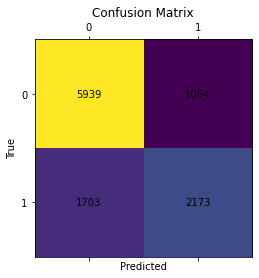

In [25]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(test_y, y_pred):
    """
    Given test_y and y_predictions, plot confusion matrix.
    """
    cm = confusion_matrix(test_y, y_pred)
    fig, ax = plt.subplots()
    ax.matshow(cm)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:d}'.format(z), ha='center', va='center')

    plt.show()
plot_confusion_matrix(test_y, prediction)